In [6]:
!pip install numpy matplotlib
!pip install ipykernel -U --user --force-reinstall'


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --force-reinstall'


✔ Teste 1/10 | n = 100 | FB: 0.01659s | D&C: 0.00198s
✔ Teste 2/10 | n = 644 | FB: 0.69373s | D&C: 0.02111s
✔ Teste 3/10 | n = 1188 | FB: 2.35139s | D&C: 0.04865s
✔ Teste 4/10 | n = 1733 | FB: 4.99726s | D&C: 0.07211s
✔ Teste 5/10 | n = 2277 | FB: 8.61683s | D&C: 0.10727s
✔ Teste 6/10 | n = 2822 | FB: 13.29628s | D&C: 0.13055s
✔ Teste 7/10 | n = 3366 | FB: 18.94415s | D&C: 0.16028s
✔ Teste 8/10 | n = 3911 | FB: 25.61257s | D&C: 0.19141s
✔ Teste 9/10 | n = 4455 | FB: 33.21049s | D&C: 0.22140s
✔ Teste 10/10 | n = 5000 | FB: 41.68696s | D&C: 0.25859s


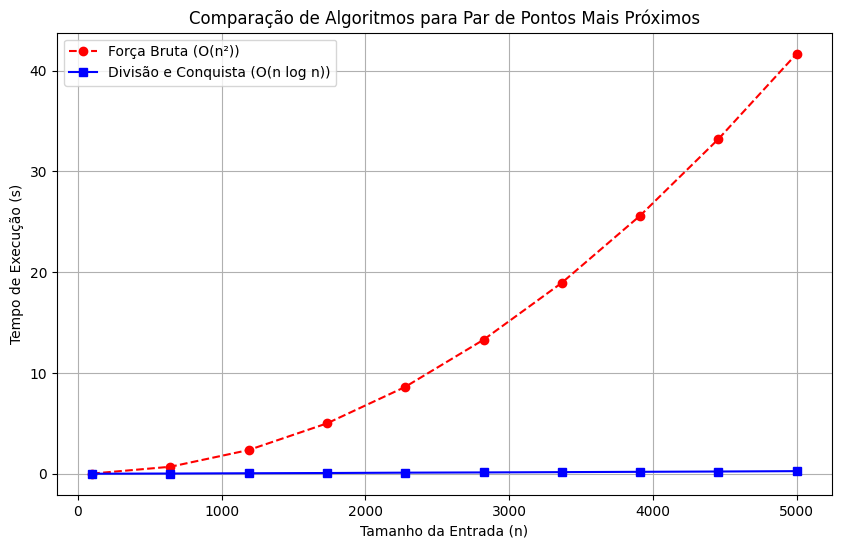

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ==============================
# 🔹 Função para gerar pontos aleatórios no plano 2D
# ==============================
def generate_points(n, x_min=-10000, x_max=10000, y_min=-10000, y_max=10000, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Define seed apenas se fornecida
    return np.random.uniform([x_min, y_min], [x_max, y_max], (n, 2))

# ==============================
# 🔹 Algoritmo Ingênuo (O(n²))
# ==============================
def brute_force_closest_pair(points):
    min_dist = float('inf')
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(points[i] - points[j])  # Distância Euclidiana
            min_dist = min(min_dist, dist)
    return min_dist

# ==============================
# 🔹 Algoritmo de Divisão e Conquista (O(n log n))
# ==============================
def closest_pair_recursive(points_sorted_x, points_sorted_y):
    n = len(points_sorted_x)
    if n <= 3:
        return brute_force_closest_pair(points_sorted_x)
    
    mid = n // 2
    left_x, right_x = points_sorted_x[:mid], points_sorted_x[mid:]
    mid_x = points_sorted_x[mid][0]
    
    left_y = [p for p in points_sorted_y if p[0] <= mid_x]
    right_y = [p for p in points_sorted_y if p[0] > mid_x]
    
    d = min(closest_pair_recursive(left_x, left_y), closest_pair_recursive(right_x, right_y))
    
    strip = [p for p in points_sorted_y if abs(p[0] - mid_x) < d]
    strip_size = len(strip)
    for i in range(strip_size):
        for j in range(i + 1, min(i + 7, strip_size)):
            d = min(d, np.linalg.norm(strip[i] - strip[j]))
    
    return d

def divide_and_conquer_closest_pair(points):
    points_sorted_x = sorted(points, key=lambda p: p[0])
    points_sorted_y = sorted(points, key=lambda p: p[1])
    return closest_pair_recursive(points_sorted_x, points_sorted_y)

# ==============================
# 🔹 Função para executar os testes
# ==============================
def run_tests(sizes, x_min, x_max, y_min, y_max, use_seed=False):
    brute_force_times, divide_conquer_times = [], []
    
    for i, n in enumerate(sizes):
        seed = 42 + i if use_seed else None
        points = generate_points(n, x_min, x_max, y_min, y_max, seed)
        
        start = time.time()
        brute_force_closest_pair(points)
        brute_force_times.append(time.time() - start)
        
        start = time.time()
        divide_and_conquer_closest_pair(points)
        divide_conquer_times.append(time.time() - start)
        
        print(f"✔ Teste {i+1}/{len(sizes)} | n = {n} | FB: {brute_force_times[-1]:.5f}s | D&C: {divide_conquer_times[-1]:.5f}s")
    
    return brute_force_times, divide_conquer_times

# ==============================
# 🔹 Função para plotar os resultados
# ==============================
def plot_results(sizes, brute_force_times, divide_conquer_times):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, brute_force_times, 'ro--', label="Força Bruta (O(n²))")
    plt.plot(sizes, divide_conquer_times, 'bs-', label="Divisão e Conquista (O(n log n))")
    plt.xlabel("Tamanho da Entrada (n)")
    plt.ylabel("Tempo de Execução (s)")
    plt.title("Comparação de Algoritmos para Par de Pontos Mais Próximos")
    plt.legend()
    plt.grid()
    plt.show()

# ==============================
# 🔹 Execução Automática
# ==============================
if __name__ == "__main__":
    # Parâmetros automáticos
    x_min, x_max, y_min, y_max = -10000, 10000, -10000, 10000
    num_tests = 10  # Número de testes
    size_min, size_max = 100, 5000  # Intervalo de tamanhos
    sizes = np.linspace(size_min, size_max, num=num_tests, dtype=int)
    
    brute_force_times, divide_conquer_times = run_tests(sizes, x_min, x_max, y_min, y_max)
    plot_results(sizes, brute_force_times, divide_conquer_times)
